### Es 1
Hai a disposizione un file `data.csv` contenente dati mensili di passeggeri con due colonne:

- `date`: data in formato `YYYY-MM` (mese/anno)
- `passengers`: numero di passeggeri per quel mese


Costruisci un modello di **regressione polinomiale** che approssima l’andamento del numero di passeggeri nel tempo.

1. Carica il dataset.
2. Convertilo in un formato numerico utilizzando una colonna `mese_numerico` che conti i mesi a partire da gennaio 1949.
3. Applica una regressione polinomiale (grado a tua scelta).
4. Calcola l’RMSE tra i valori reali e quelli predetti.
5. Visualizza i dati reali e la curva stimata con Plotly.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

df = pd.read_csv("data.csv")
# df.head(20)

In [72]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m")
df["mese_numeric"] = (df["date"].dt.year - 1949)*12 + df["date"].dt.month
# df

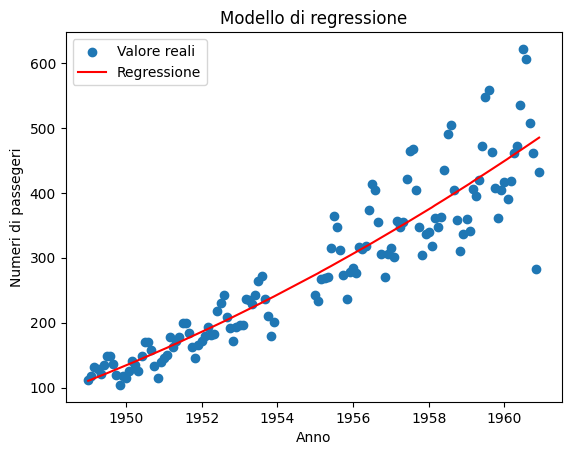

In [98]:
df["passengers"] = df["passengers"].fillna(df["passengers"].mean())
coef = np.polyfit(df["mese_numeric"], df["passengers"], deg=2)
y_pred = np.polyval(coef, df["mese_numeric"])

plt.scatter(df["date"], df["passengers"], label="Valore reali")
plt.plot(df["date"], y_pred,label="Regressione", color= "red")
plt.title("Modello di regressione")
plt.xlabel("Anno")
plt.ylabel("Numeri di passegeri")
plt.legend()
plt.show()


In [ ]:
rmse = np.sqrt(np.sum((df["passengers"]-y_pred)**2)/len(y_pred))
print(f"RMSE tra i valori reali e quelli predetti: {rmse:.3f}")

RMSE tra i valori reali e quelli predetti: 47.736


In [ ]:
import plotly.express as px


### Es2. 
Costruisci una web app con Dash che permette all’utente di scegliere il grado del polinomio per adattare un modello di regressione ai dati non lineari e vedere il risultato aggiornarsi dinamicamente.


1. Genera 100 punti x tra -3 e 3.

2. Calcola ad esempio y = x³ - x + rumore.

3. Costruisci un'interfaccia Dash con:
    - uno slider per scegliere il grado del polinomio (1–10),
    - un grafico Plotly che mostra i dati e la curva stimata.

4. Usa PolynomialFeatures + LinearRegression da scikit-learn per stimare la curva